In [337]:
import os 
import cv2
import uuid 
import time
import keras 

In [165]:
img_path = 'data/images'
number_images = 90

In [166]:
# cap = cv2.VideoCapture(0)
# for i in range(number_images):
#   ret, frame = cap.read()
#   img_name = os.path.join(img_path, f'{str(uuid.uuid1())}.jpg')
#   cv2.imwrite(img_name, frame)
#   cv2.imshow('frame', frame)
#   time.sleep(0.5)
#   if cv2.waitKey(1) & 0xFF == ord('q'):
#     break
# cap.release()
# cv2.destroyAllWindows()

In [167]:
import tensorflow as tf
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

In [258]:
def load_img(x):
    img = tf.io.read_file(x)
    img =tf.io.decode_jpeg(img)
    return img

In [169]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)

In [170]:
images.as_numpy_iterator().next()

b'data\\images\\789621ac-c452-11ed-9eb5-7c214ae279f7.jpg'

In [171]:
img = images.map(load_img)

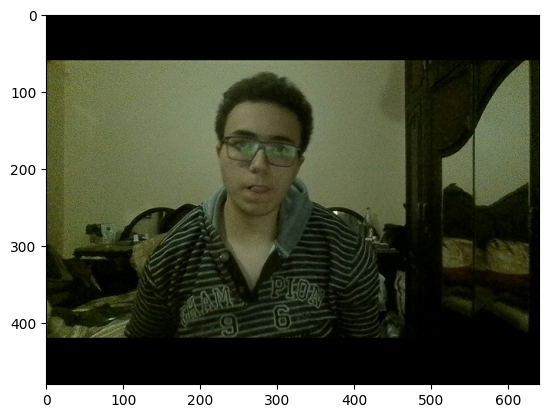

In [172]:
plt.imshow(img.as_numpy_iterator().next())

In [173]:
from sklearn.model_selection import train_test_split
import glob
import shutil

# images_path = glob.glob('data/images/*.jpg')
# labels_path = glob.glob('data/labels/*.json')

# x_train, x_test, y_train, y_test = train_test_split(images_path, labels_path, shuffle=False, train_size=0.85, random_state=0)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, shuffle=False, train_size=0.85, random_state=0)

def split(x, y, c):
    for source_path_img, source_path_label in zip(x, y):
        shutil.copyfile(source_path_img, c + '/' + source_path_img.split('/')[1])
        shutil.copyfile(source_path_label, c + '/' + source_path_label.split('/')[1])

# split(x_train, y_train, 'data/train')
# split(x_test, y_test, 'data/test')
# split(x_val, y_val, 'data/val')

In [174]:
import albumentations as alb

In [175]:
cv2.imread('data/images/79400bd4-c452-11ed-abaf-7c214ae279f7.jpg').shape

(480, 640, 3)

In [176]:
aug = alb.Compose([alb.RandomCrop(450, 450),
                  alb.HorizontalFlip(0.5), 
                  alb.RandomBrightnessContrast(0.2), 
                  alb.RandomGamma(0.2), 
                  alb.RGBShift(p=0.5), 
                  alb.VerticalFlip(p=0.5)], 
                bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

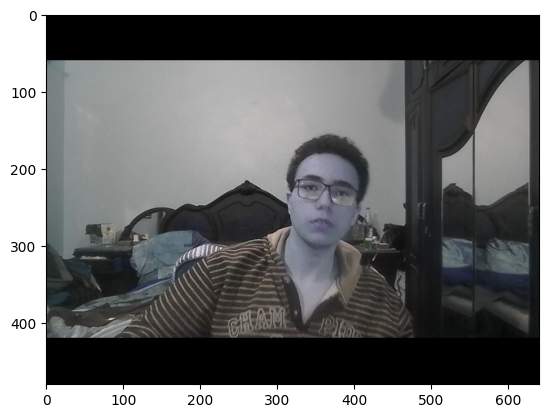

In [177]:
img = cv2.imread('data/images/7e4d6fc0-c452-11ed-ad16-7c214ae279f7.jpg')
plt.imshow(img)

In [178]:
with open('data/labels/7e4d6fc0-c452-11ed-ad16-7c214ae279f7.json', 'r') as f:
    label=json.load(f)

In [179]:
label['shapes'][0]['points']

[[311.025641025641, 177.43589743589743],
 [413.0769230769231, 301.53846153846155]]

In [180]:
coor = list(np.divide([311.025641025641, 177.43589743589743, 413.0769230769231, 301.53846153846155], [640, 480, 640, 480]))

In [181]:
augmented = aug(image = img, bboxes=[coor], class_labels=['face'])

In [182]:
augmented['bboxes']

[(0.17982905982905983,
  0.3276353276353276,
  0.40660968660968666,
  0.6034188034188034)]

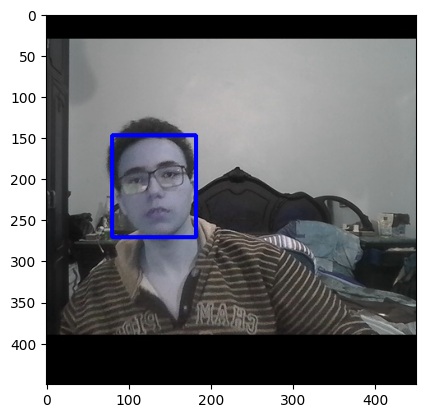

In [183]:
cv2.rectangle(augmented['image'], tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)), 
              tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)), (0, 0, 255), 4)
plt.imshow(augmented['image'])

In [184]:
import glob
for label, img in zip(glob.glob('data/labels/*.json'), glob.glob('data/images/*.jpg')):
    imag = cv2.imread(img)
    c = []
    if os.path.exists(label):
        with open(label, 'r') as f:
            label_ = json.load(f)
   
        c.append(label_['shapes'][0]['points'][0][0])
        c.append(label_['shapes'][0]['points'][0][1])
        c.append(label_['shapes'][0]['points'][1][0])
        c.append(label_['shapes'][0]['points'][1][1])
        c = list(np.divide(c, [640,480,640,480]))   
    
    try:
        for i in range(60):
        
            augmen = aug(image = imag, bboxes = [c], class_labels=['face'])
            cv2.imwrite('aug_data/' + f'{img.split("/")[1].split(".")[0]}_{i}.jpg', augmen['image'])
        
            j = {} 
            j['image'] = img.split('\\')[1]
        
            if os.path.exists(label):
                if len(augmen['bboxes']) == 0:
                    j['bbox'] = [0, 0, 0, 0]
                    j['class'] = 0
                else:
                    j['bbox'] = augmen['bboxes'][0]
                    j['class'] = 1
            else: 
                j['bbox'] = [0, 0, 0, 0]
                j['class'] = 0 
   
            with open ('aug_data/' + f'{label.split("/")[1].split(".")[0]}_{i}.json', 'w') as f:
                json.dump(j, f)
    except Exception as e:
            print(e)

y_max is less than or equal to y_min for bbox [0.5837339743589743, 0.7115384615384616, 0.719951923076923, 0.4551282051282051, 'face'].
y_max is less than or equal to y_min for bbox [0.5957532051282051, 0.7104700854700855, 0.7640224358974359, 0.48824786324786323, 'face'].
y_max is less than or equal to y_min for bbox [0.6614583333333333, 0.717948717948718, 0.7728365384615385, 0.47435897435897434, 'face'].
x_max is less than or equal to x_min for bbox [0.8786057692307692, 0.7264957264957265, 0.6582532051282051, 0.8771367521367522, 'face'].
x_max is less than or equal to x_min for bbox [0.15665064102564102, 0.44978632478632474, 0.023637820512820505, 0.733974358974359, 'face'].
x_max is less than or equal to x_min for bbox [0.13341346153846156, 0.8194444444444445, 0.0, 0.8746500147362217, 'face'].
y_max is less than or equal to y_min for bbox [0.6502403846153846, 0.7061965811965812, 0.7744391025641025, 0.49679487179487175, 'face'].
y_max is less than or equal to y_min for bbox [0.659054487

In [185]:
images_path = glob.glob('aug_data/images/*.jpg')
labels_path = glob.glob('aug_data/labels/*.json')

x_train, x_test, y_train, y_test = train_test_split(images_path, labels_path, shuffle=False, train_size=0.85, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, shuffle=False, train_size=0.85, random_state=0)

split(x_train, y_train, "aug_data/train")
split(x_test, y_test, 'aug_data/test')
split(x_val, y_val, 'aug_data/val')



In [259]:
from keras.preprocessing.image import ImageDataGenerator

In [260]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_img)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [261]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_img)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [262]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_img)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [281]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [282]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [283]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3554, 3554, 738, 738, 628, 628)

In [284]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [285]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [286]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


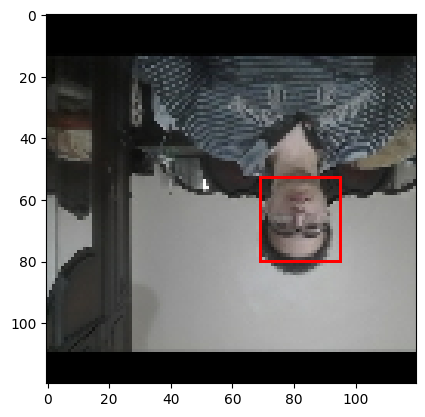

In [319]:
i = train.as_numpy_iterator().next()
cv2.rectangle(i[0][1],
                  tuple(np.multiply(i[1][1][1][:2], [120,120]).astype(int)),
                  tuple(np.multiply(i[1][1][1][2:], [120,120]).astype(int)), 
                        (255,0,0), 1)
plt.imshow(i[0][1])

In [320]:
from keras.models import *
from keras.layers import *
from keras.applications import VGG16

In [321]:
vgg = VGG16(include_top=False)

In [322]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [323]:
def build_model():
    
    input_layer = Input(shape=(120, 120, 3))
    
    vgg = VGG16(include_top=False)(input_layer)
    
    f1 = GlobalMaxPool2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    f2 = GlobalMaxPool2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)    
    
    facetracker = Model(inputs = input_layer, outputs = [class2, regress2])
    return facetracker

In [325]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3154 , 0.324  , 0.5283 , 0.567  ],
        [0.4265 , 0.3877 , 0.6465 , 0.6235 ],
        [0.5474 , 0.388  , 0.754  , 0.6377 ],
        [0.3232 , 0.2773 , 0.5693 , 0.61   ],
        [0.0383 , 0.268  , 0.273  , 0.579  ],
        [0.03442, 0.292  , 0.2487 , 0.5815 ],
        [0.4436 , 0.3477 , 0.6875 , 0.61   ],
        [0.3718 , 0.3318 , 0.656  , 0.6553 ]], dtype=float16))

In [326]:
facetracker = build_model()
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [327]:
x, y = train.as_numpy_iterator().next()

In [329]:
x.shape

(8, 120, 120, 3)

In [331]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.1638 , 0.09314, 0.4692 , 0.2595 ],
        [0.4421 , 0.403  , 0.662  , 0.639  ],
        [0.8066 , 0.3728 , 1.     , 0.62   ],
        [0.4878 , 0.2957 , 0.785  , 0.6533 ],
        [0.4905 , 0.289  , 0.7686 , 0.6777 ],
        [0.566  , 0.3584 , 0.8237 , 0.5977 ],
        [0.4468 , 0.4436 , 0.6484 , 0.6704 ],
        [0.476  , 0.4497 , 0.7563 , 0.793  ]], dtype=float16))

In [332]:
classes, coords = facetracker.predict(x)

1/1 [==============================] - 16s 16s/step


In [333]:
classes, coords

(array([[0.58072597],
        [0.56916976],
        [0.5599185 ],
        [0.64536047],
        [0.63962126],
        [0.5793623 ],
        [0.63459504],
        [0.6456789 ]], dtype=float32),
 array([[0.45717365, 0.51123285, 0.5660719 , 0.4748463 ],
        [0.3883293 , 0.5600815 , 0.6509509 , 0.45966285],
        [0.4301162 , 0.5131589 , 0.58227   , 0.47733572],
        [0.49932   , 0.49086177, 0.6658071 , 0.47707945],
        [0.50238293, 0.50348806, 0.66568065, 0.4728926 ],
        [0.37558103, 0.5768357 , 0.62606525, 0.41873053],
        [0.46181193, 0.50923556, 0.6710603 , 0.4666125 ],
        [0.45693538, 0.4864177 , 0.6893439 , 0.4678906 ]], dtype=float32))

In [335]:
batches_per_epoch = len(train)
lr_decay = (1/0.75-1)/batches_per_epoch

In [339]:
opt = keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [346]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2]-yhat[:, :2]))
    
    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0] 
    
    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]     

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    
    return delta_coord + delta_size

In [347]:
classloss = keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [348]:
localization_loss(y[1], coords).numpy()

1.6089238

In [350]:
classloss(y[0], classes).numpy()

0.50123614

In [351]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=1.6089238>

In [352]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [353]:
model = FaceTracker(facetracker)

In [354]:
model.compile(opt, classloss, regressloss)

In [355]:
logdir='logs'

In [356]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [374]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
445/445 [==============================] - 32s 55ms/step - total_loss: 0.0670 - class_loss: 0.0060 - regress_loss: 0.0640 - val_total_loss: 0.0705 - val_class_loss: 1.3501e-05 - val_regress_loss: 0.0705
Epoch 2/5
445/445 [==============================] - 31s 56ms/step - total_loss: 0.0669 - class_loss: 0.0059 - regress_loss: 0.0640 - val_total_loss: 0.1503 - val_class_loss: 0.0046 - val_regress_loss: 0.1480
Epoch 3/5
445/445 [==============================] - 32s 55ms/step - total_loss: 0.0667 - class_loss: 0.0059 - regress_loss: 0.0638 - val_total_loss: 0.0410 - val_class_loss: 2.8610e-06 - val_regress_loss: 0.0410
Epoch 4/5
445/445 [==============================] - 33s 55ms/step - total_loss: 0.0662 - class_loss: 0.0059 - regress_loss: 0.0633 - val_total_loss: 0.3792 - val_class_loss: 0.0145 - val_regress_loss: 0.3719
Epoch 5/5
445/445 [==============================] - 33s 56ms/step - total_loss: 0.0663 - class_loss: 0.0061 - regress_loss: 0.0633 - val_total_loss: 0.1214

In [375]:
hist.history

{'total_loss': [0.0005280512268655002,
  0.0005098451511003077,
  9.74461727309972e-05,
  0.00011387326230760664,
  5.1811621233355254e-05],
 'class_loss': [1.1623041245911736e-05,
  1.8656566680874676e-05,
  6.496928108390421e-06,
  3.337865791763761e-06,
  2.0265620150894392e-06],
 'regress_loss': [0.0005222397157922387,
  0.0005005168495699763,
  9.419770503882319e-05,
  0.0001122043322538957,
  5.0798338634194806e-05],
 'val_total_loss': [0.07054191827774048,
  0.15028612315654755,
  0.041045479476451874,
  0.37915000319480896,
  0.12144355475902557],
 'val_class_loss': [1.350069487671135e-05,
  0.004639443010091782,
  2.861027041944908e-06,
  0.014516875147819519,
  0.00437777629122138],
 'val_regress_loss': [0.07053516805171967,
  0.1479663997888565,
  0.041044048964977264,
  0.3718915581703186,
  0.11925466358661652]}

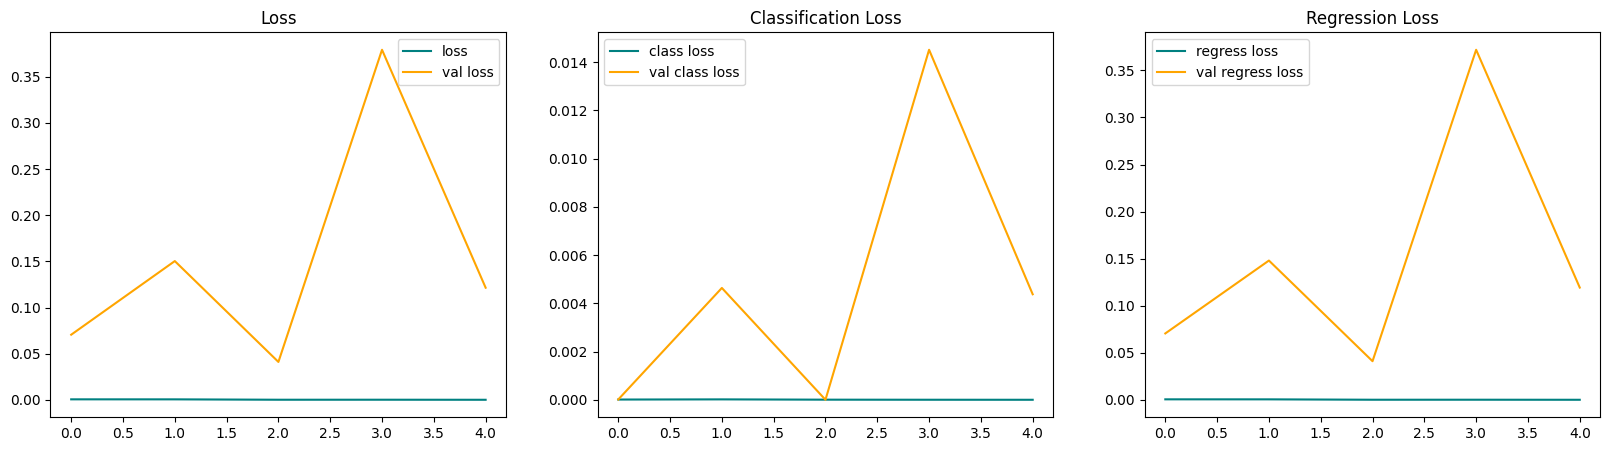

In [376]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

1/1 [==============================] - 0s 46ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


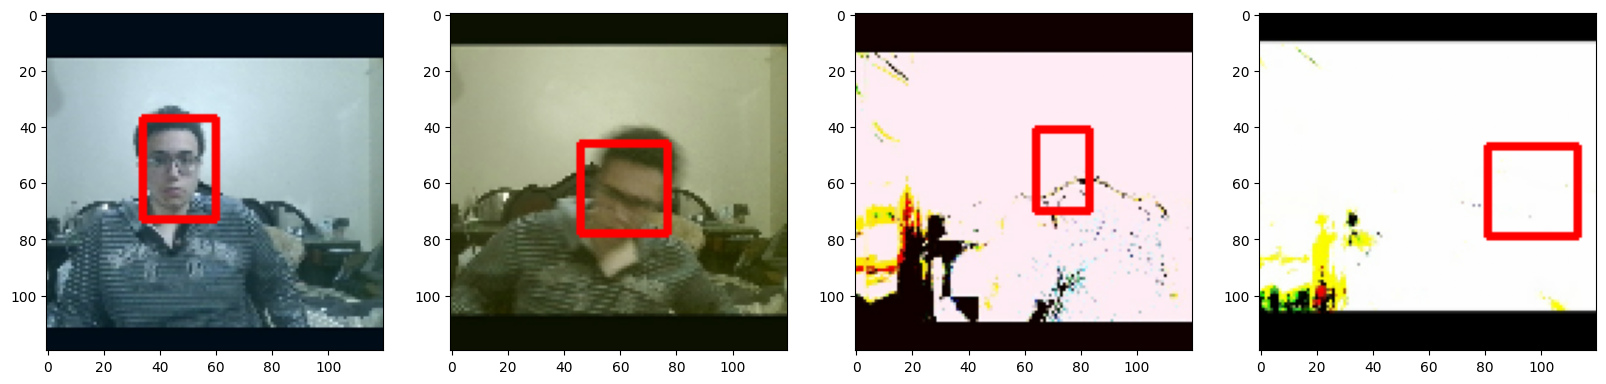

In [382]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [377]:
from tensorflow.keras.models import load_model

In [378]:
facetracker.save('facetracker.h5')

In [379]:
facetracker = load_model('facetracker.h5')

In [383]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 15ms/step
